In [1]:
using InteractiveIsing, GLMakie, FileIO, CairoMakie
using InteractiveIsing.Processes
import InteractiveIsing as II

## Utility functions for experiments
### Use ii. to check if the terms are correct
### Now the H is written like H_self + H_quartic
### Which is Jii*Si^2 + Qc*Jii*Si^4 wichi means Jii=a, Qc*Jii=b in a*Si^2 + b*Si^4

function newmakie(makietype, args...)
    f = makietype(args...)
    scr = GLMakie.Screen()
    display(scr, f)
    f
end

# Weight function variant 1
function weightfunc1(dr,c1,c2)
    prefac = 1
    d = delta(c1,c2)
    dx, dy, dz = d
    # Always positive coupling (ferromagnetic)
    return prefac / norm2(d)
end

function weightfunc2(dr, c1, c2)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    physical_dr2 = sqrt((0.05*dx)^2 + (0.05*dy)^2 + (0.2*dz)^2) 
    # z 方向保持铁磁 (正耦合)
    # if dx == 0 && dy == 0
    #     prefac = 1
    # elseif dx == 0
    #     prefac = 1
    # else
    #     # xy 平面反铁磁 (负耦合)
    #     prefac = -1
    # end
    prefac = 1
    return prefac / physical_dr2
end

function weightfunc3(dr, c1, c2)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    physical_dr2 = sqrt((0.3*dx)^2 + (0.3*dy)^2 + (0.3*dz)^2) 
    # z 方向保持铁磁 (正耦合)
    if dx == 0 && dy == 0
        prefac = 1
    elseif dx == 0
        prefac = 1
    else
        # xy 平面反铁磁 (负耦合)
        prefac = -1
    end
    # prefac = 1
    return prefac / physical_dr2
end

function weightfunc_angle_anti(dr, c1, c2)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    ax=0.2
    ay=0.2
    az=0.1
    rx = ax*dx
    ry = ay*dy
    rz = az*dz

    r2 = rx^2 + ry^2 + rz^2
    r  = sqrt(r2)

    cosθ = rz / r              # 与 z 轴夹角的 cos
    prefac  = -1 + 3*cosθ^2        # Ising 沿 z 的角度因子

    return prefac / r^3
end

function weightfunc_angle_ferro(dr, c1, c2)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    ax=0.2
    ay=0.2
    az=0.1
    rx = ax*dx
    ry = ay*dy
    rz = az*dz

    r2 = rx^2 + ry^2 + rz^2
    r  = sqrt(r2)

    cosθ = rz / r              # 与 z 轴夹角的 cos
    prefac  = -1 + 3*cosθ^2        # Ising 沿 z 的角度因子

    return abs(prefac) / r^3
end

# Shell-based coupling + dipolar coupling
function weightfunc_shell(dr, c1, c2, ax, ay, az, csr, lambda1, lambda2)
    dx, dy, dz = delta(c1, c2)
    k1  = 1.0
    k2  = lambda1 * k1
    k3  = lambda2 * k2

    # --- physical distance for dipolar term ---
    rx = ax * dx
    ry = ay * dy
    rz = az * dz
    r2 = rx^2 + ry^2 + rz^2

    if r2 == 0
        return 0.0
    end
    r  = sqrt(r2)

    # --- dipolar angular factor (Ising along z) ---
    cosθ  = rz / r
    prefac_dip = -1 + 3 * cosθ^2
    Jdip = prefac_dip / r^3

    # --- shell-based short-range term ---
    s = dx*dx + dy*dy + dz*dz

    prefac_sr = if s == 1
        k1
    elseif s == 2
        k2
    elseif s == 3
        k3
    else
        0.0
    end

    Jsr = csr * prefac_sr
    return Jdip + Jsr
end


# Skymion-like coupling
function weightfunc_skymion(dr,c1,c2)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    # z 方向保持铁磁 (正耦合)
    prefac = 2
    if abs(dy) > 0 || abs(dx) > 0
        prefac = -2
    end
    
    return prefac / norm2(d)
end

function weightfunc_xy_antiferro(dr, c1, c2, ax, ay, az)
    d = delta(c1, c2)
    dx, dy, dz = d  # 先解包
    physical_dr2 = sqrt((ax*dx)^2 + (ay*dy)^2 + (az*dz)^2) 
    # z 方向保持铁磁 (正耦合)
    if dx == 0 && dy == 0
        prefac = 1
    elseif dx == 0
        prefac = 1
    else
        # xy 平面反铁磁 (负耦合)
        prefac = -1
    end
    
    return prefac / physical_dr2
end

function weightfunc_xy_dilog_antiferro(dr, c1, c2)
    d = delta(c1, c2)
    dx, dy, dz = d
    
    if (abs(dx) + abs(dy)) % 2 == 0
        return 1.0 / norm2(d)    # 铁磁
    else
        return -1.0 / norm2(d)   # 反铁磁
    end
    
    return prefac / norm2(d)
end

function weightfunc4(dr,c1,c2)
    prefac = -1
    d = delta(c1,c2)
    dx, dy, _ = d
    # Always positive coupling (ferromagnetic)
    return prefac / norm2(d)
end




SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


begin
    #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:51 =#
    struct Metropolis <: ProcessAlgorithm
        #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:51 =#
    end
    #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:53 =#
    #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:53 =# @inline function Processes.step!(f::Metropolis, context::C) where C <: Processes.AbstractContext
            #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:53 =#
            #= d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\ProcessAlgorithms\ProcessAlgorithms.jl:54 =#
            #= d:\Code\Haoranbranch\InteractiveIsing.jl\src\MCAlgorithms\Algorithms\Metropolis.jl:14 =#
            #= d:\Code\Haoranbranch\InteractiveIsin

weightfunc4 (generic function with 1 method)

In [2]:
### Triangle Pulse A process
##################################################################################
@NamedProcessAlgorithm Metropolis function TrianglePulseA(args)
    (;pulse, M, x, y, hamiltonian) = args
    pulse_val = pulse[algo_call_number(args)]
    hamiltonian.b[] = pulse_val
    push!(x, pulse_val)
    push!(y, M[])
    return (;)
end
function Processes.prepare(::TrianglePulseA, args)
    (;amp, numpulses, rise_point) = args
    steps = num_calls(args)

    first  = LinRange(0, amp, round(Int,rise_point))
    second = LinRange(amp, 0, round(Int,rise_point))
    third  = LinRange(0, -amp, round(Int,rise_point))
    fourth = LinRange(-amp, 0, round(Int,rise_point))

    pulse = vcat(first, second, third, fourth)
    pulse = repeat(pulse, numpulses)

    if steps < length(pulse)
        "Wrong length"
    else
        fix_num = num_calls(args) - length(pulse)
        fix_arr = zeros(Int, fix_num)
        pulse   = vcat(pulse, fix_arr)
    end

    # Predefine storage arrays
    x = Float32[]
    y = Float32[]
    processsizehint!(args, x)
    processsizehint!(args, y)

    return (;pulse, x, y)
end
##################################################################################



LoadError: LoadError: UndefVarError: `@NamedProcessAlgorithm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at d:\Code\Haoranbranch\InteractiveIsing.jl\Tutorial\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W1sZmlsZQ==.jl:3

In [3]:
xL = 80  # Length in the x-dimension
yL = 80  # Length in the y-dimension
zL = 10   # Length in the z-dimension
g = IsingGraph(xL, yL, zL, stype = Continuous(),periodic = (:x,:y))
# Visual marker size (tune for clarity vs performance)
II.makie_markersize[] = 0.3
# Launch interactive visualization (idle until createProcess(...) later)
interface(g)
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)

Graph: Continuous() IsingLayer 1 with size (80, 80, 10) and stateset (-1.0f0, 1.0f0)

 with connections:
 and 0 defects
InteractiveIsing.LayoutPanel


Ising{ParamTensor{Float32, 0.0f0, true, Array{Float32, 0}, 1}}((InteractiveIsing.Quadratic(), InteractiveIsing.MagField{ParamTensor{Float32, 0.0f0, true, Array{Float32, 0}, 1}}(ParamTensor{Float32}("Magnetic Field", active, val=0.0, len=64000))))

In [4]:
#### Weight function setup (Connection setup)

#### Set the distance scaling
setdist!(g, (1.0,1.0,1.0))
# wg1 = @WG weightfunc_xy_dilog_antiferro NN = (2,2,2)
# wg1 = @WG weightfunc1
wg1 = @WG weightfunc1
wg2 = @WG weightfunc2 NN = (2,2,2)
wg3 = @WG weightfunc_angle_anti NN = 3
wg4 = @WG weightfunc_angle_ferro NN = 3
### weightfunc_shell(dr,c1,c2, ax, ay, az, csr, lambda1, lambda2), Lambda is the ratio between different shells
wg5 = @WG (dr,c1,c2) -> weightfunc_shell(dr, c1, c2, 1.5, 1.5, 1, 1, 0.1, 0.5) NN = 3
# wg1 = @WG weightfunc1 NN = (2,2,2)
# wg1 = @WG weightfunc1 NN = (2,2,2)
# wg1 = @WG (dr,c1,c2) -> weightfunc_xy_antiferro(dr, c1, c2, 2, 2, 2) NN = (2,2,2)


WeightGenerator{var"#35#36", 3}(var"#35#36"(), :((dr, c1, c2)->begin
          weightfunc_shell(dr, c1, c2, 1.5, 1.5, 1, 1, 0.1, 0.5)
      end), Random.MersenneTwister(0xdd1108e6b08d162d60f36241356a59d2))

In [5]:
genAdj!(g, wg5)

64000×64000 SparseArrays.SparseMatrixCSC{Float32, Int32} with 17766400 stored entries:
⎡⠻⣦⡀⠀⠻⣦⡀⠀⠻⣦⡀⠈⠻⣦⡀⠈⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠁⠀⠀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠀⠀⢀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠈⠻⣦⡀⠈⠻⣦⠀⠈⠻⣦⠀⠈⠻⣦⎦

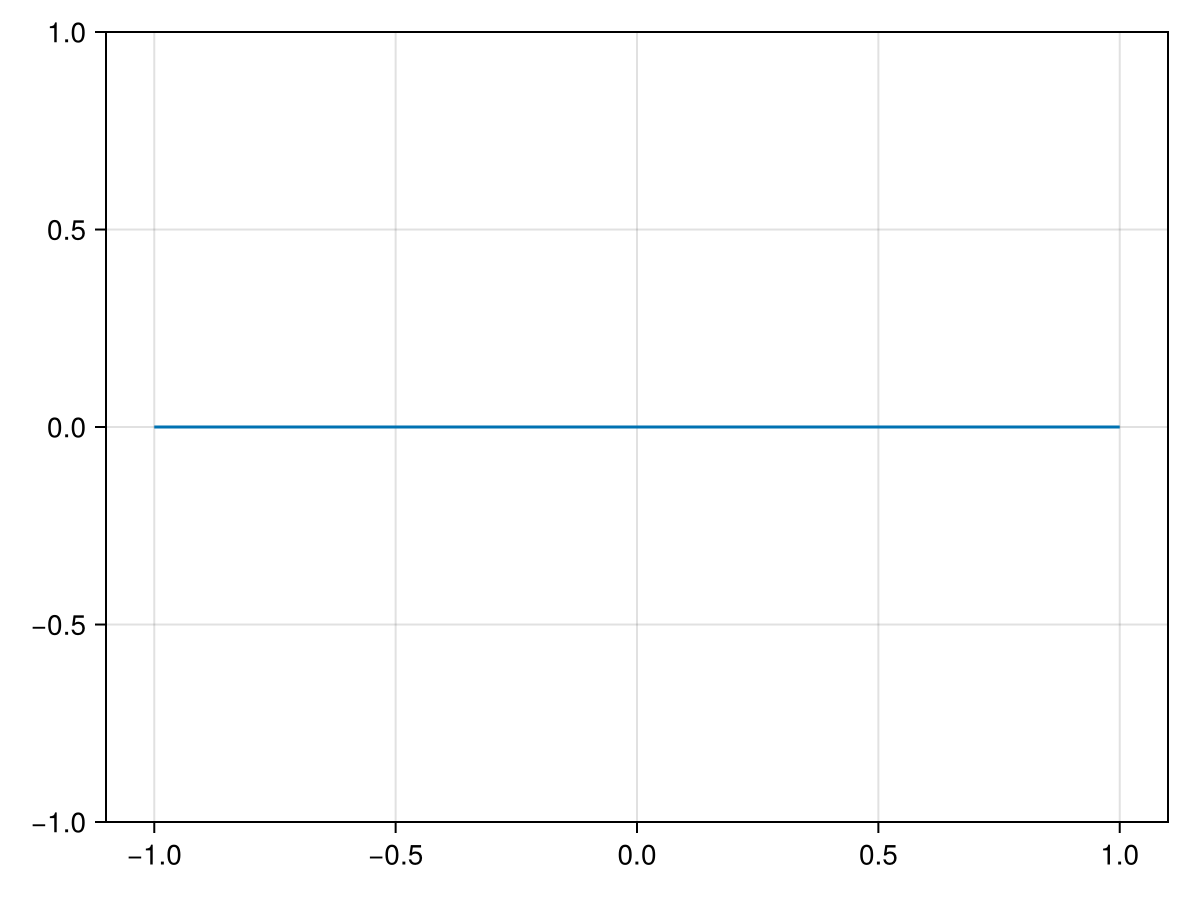

In [6]:
# a1, b1, c1 = -20, 16, 0 
a1, b1, c1 = 0, 0, 0 
Ex = range(-1.0, 1.0, length=1000)
Ey = a1 .* Ex.^2 .+ b1 .* Ex.^4 .+ c1 .* Ex.^6
inlineplot() do 
    lines(Ex, Ey)
end

In [196]:
# show_connections(g,1,1,1)
visualize_connections(g[1],1,1,1, adj = adj(g))
visualize_connections(g[1],1,1,1, adj = g.hamiltonian[3].field_adj)

InteractiveIsing.MakieWindow{:Connections, Nothing}
InteractiveIsing.MakieWindow{:Connections, Nothing}


(-1.0f0, 1.0f0)

In [ ]:
temp(g,30)

In [119]:
g.hamiltonian = Ising(g)
reprepare(g)
### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)

In [7]:
### Set hamiltonian with selfenergy
Layer_Dep = 1
Cdep=15
Cz = 0.1
lambda = 0.1
# g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((-z-1)/lambda) , NN=(64,64,3)) + Quartic(g) + Sextic(g)
# reprepare(g)

# g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((-z-1)/lambda) , NN=(20,20,4)) + Quartic(g) + Sextic(g)

g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((z-1)/lambda) , NN=10)
reprepare(g)

# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Use ii. to check if the terms are correct
### Now the H is written like H_self + H_quartic
### Which is Jii*Si^2 + Qc*Jii*Si^4 wichi means Jii=a, Qc*Jii=b in a*Si^2 + b*Si^4

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)

In [8]:
### Change depolarization strength
Cdep=120*10
g.hamiltonian[3].c[] = Cdep/(2*Layer_Dep*xL*yL*zL)

0.009375

In [ ]:
### Set hamiltonian with selfenergy, quartic and sextic terms

Layer_Dep = 2
Cdep=50
Cz = 1
lambda = 0.5
# g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((-z-1)/lambda) , NN=(64,64,3)) + Quartic(g) + Sextic(g)
# reprepare(g)

# g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((-z-1)/lambda) , NN=(20,20,4)) + Quartic(g) + Sextic(g)

g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/exp((z-1)/lambda) , NN=8) + Quartic(g) + Sextic(g)
reprepare(g)

# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Use ii. to check if the terms are correct
### Now the H is written like H_self + H_quartic
### Which is Jii*Si^2 + Qc*Jii*Si^4 wichi means Jii=a, Qc*Jii=b in a*Si^2 + b*Si^4

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)
### Set Qc*Jii
g.hamiltonian[4].qc[] = b1/a1
### Set Sc*Jii
g.hamiltonian[5].sc[] = c1/a1

In [ ]:
### Change depolarization strength
Cdep=10000
g.hamiltonian[3].c[] = Cdep/(2*Layer_Dep*xL*yL)

In [ ]:
Temperature=1
temp(g,Temperature)

1

In [9]:
Temperature=1
temp(g,Temperature)

### Run simulation process
fullsweep = xL*yL*zL
Time_fctr = 0.5
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =20
PulseN = 2
Pulsetime = (PulseN * 4 + 10) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;


# inlineplot() do 
#     lines(Ex, Ey)
# end

figPr = Figure()
ax = Axis(figPr[1, 1])
lines!(ax, voltage, Pr)
save("D:/Code/data/shell/stripes with skymions/axayaz_1.5_1.5_1_T$(Temperature)_Amp$(Amptitude)_Speed$(Time_fctr)_80_20_20.png", figPr)

inlineplot() do 
    lines(voltage, Pr)
end


# inlineplot() do 
#     lines(Pr)
# end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)

Estimated time to completion: 0:22:8
Of which remaining: 0:22:8


FieldError: FieldError: type NamedTuple has no field `x`, available fields: `g`, `amp`, `numpulses`, `rise_point`, `algo`, `Metropolis`

Estimated time to completion: 0:1:19
Of which remaining: 0:1:19


┌ Warning: An algorithm is providing arguments that are already defined in the input arguments: [:g]. 
│  The algorithm arguments will be used.
└ @ InteractiveIsing.Processes d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\Trackers\UniqueAlgorithms.jl:75


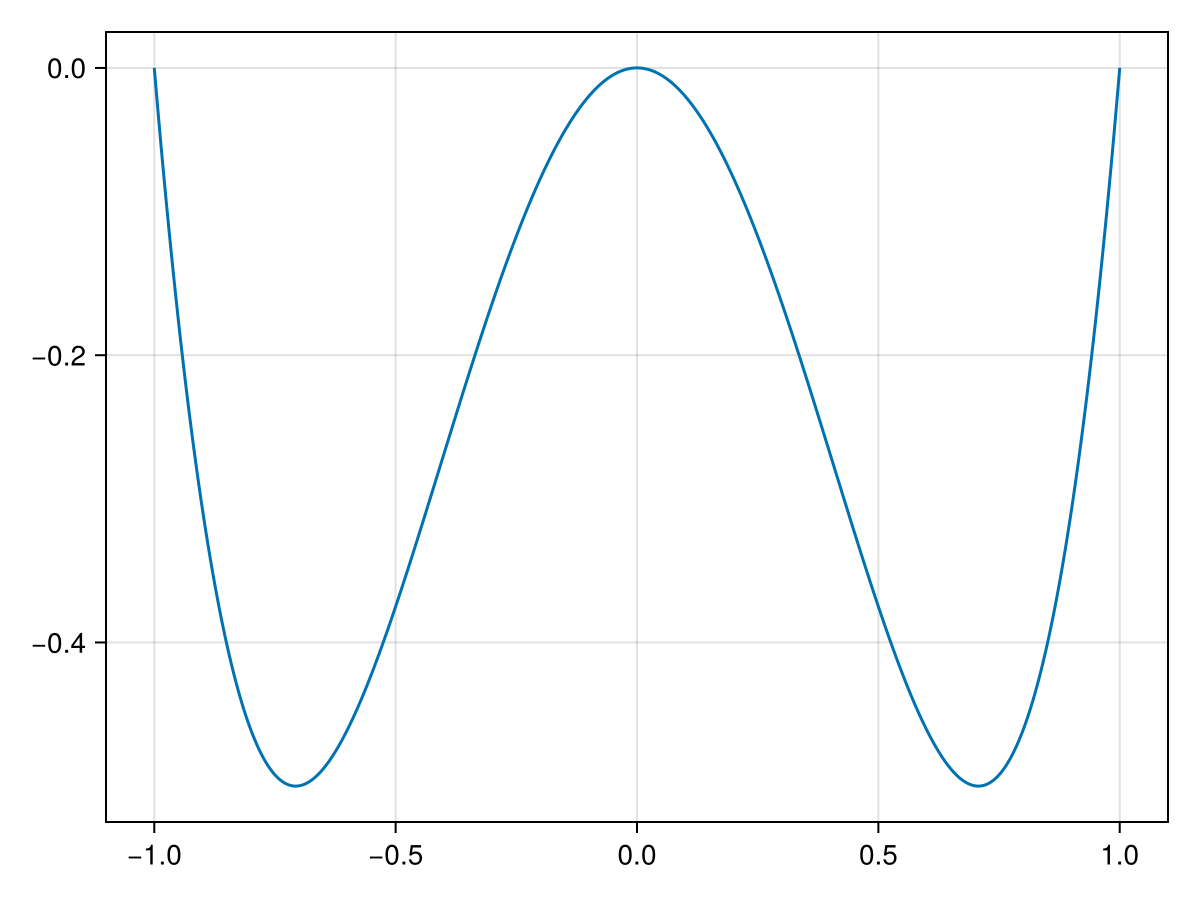

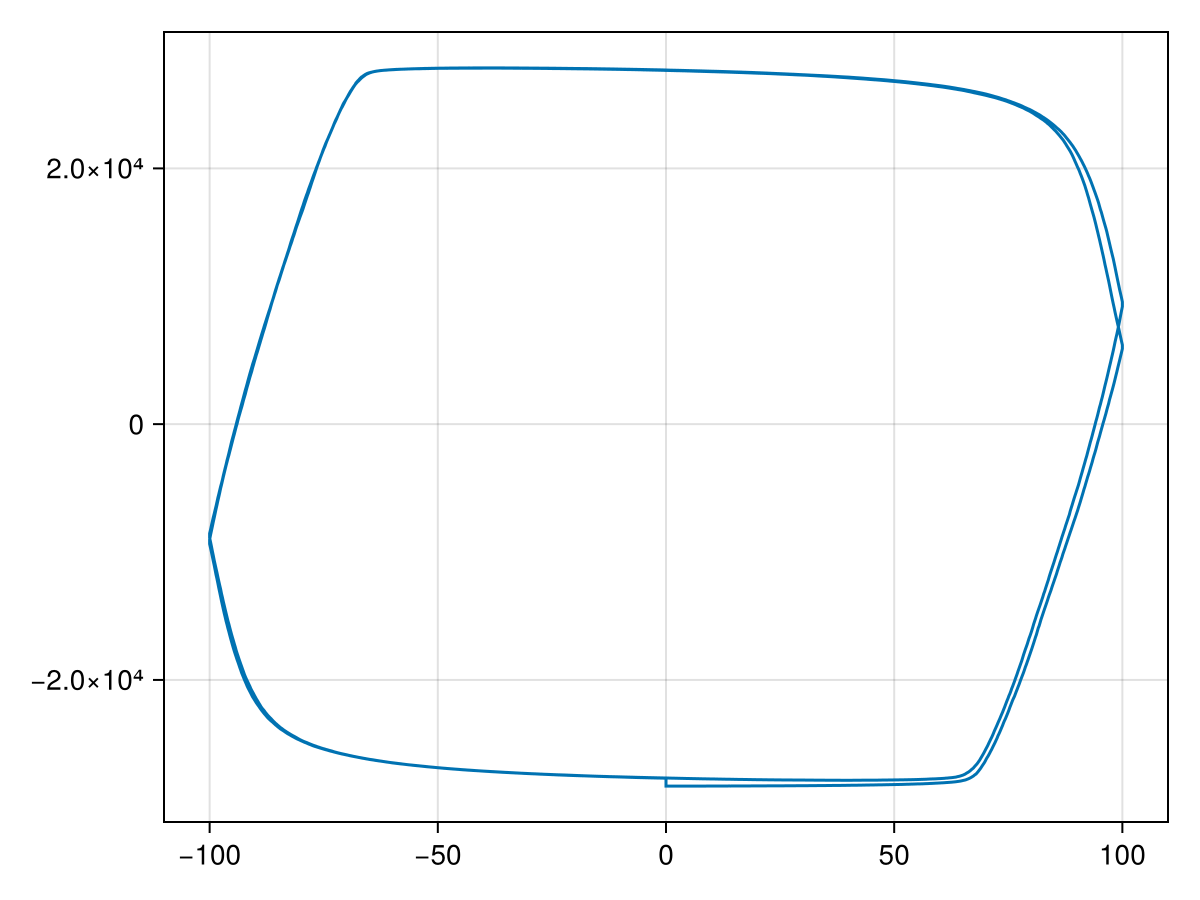

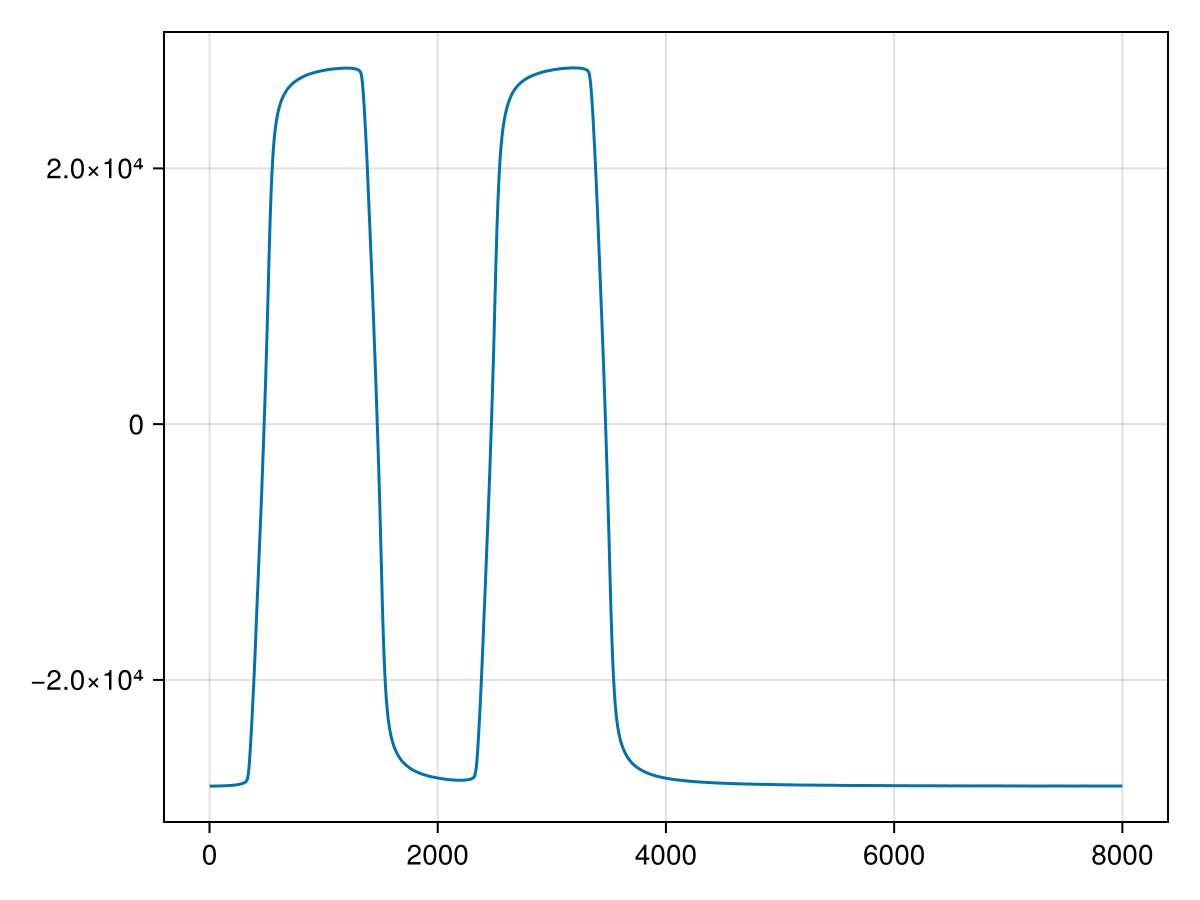

In [51]:
### Run simulation process
### Run with wg3

fullsweep = xL*yL*zL
Time_fctr = 0.1
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =100
PulseN = 2
Pulsetime = (PulseN * 4 + 8) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;


inlineplot() do 
    lines(Ex, Ey)
end

inlineplot() do 
    lines(voltage, Pr)
end

inlineplot() do 
    lines(Pr)
end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)

In [67]:
amp = 1.0
x0 = 1.0
x = range(1.0, 8.0, length=1000)
lambda_list = range(0.1, 0.9, length=9)

fig = Figure()
ax = Axis(fig[1, 1])

for λ in lambda_list
    y = @. amp * exp(-(x - x0) / λ)
    lines!(ax, x, y, label="λ = $(round(λ, digits=1))")
end

axislegend(ax)
fig 

┌ Warning: An algorithm is providing arguments that are already defined in the input arguments: [:g]. 
│  The algorithm arguments will be used.
└ @ InteractiveIsing.Processes d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\Trackers\UniqueAlgorithms.jl:75


Estimated time to completion: 0:0:7
Of which remaining: 0:0:7


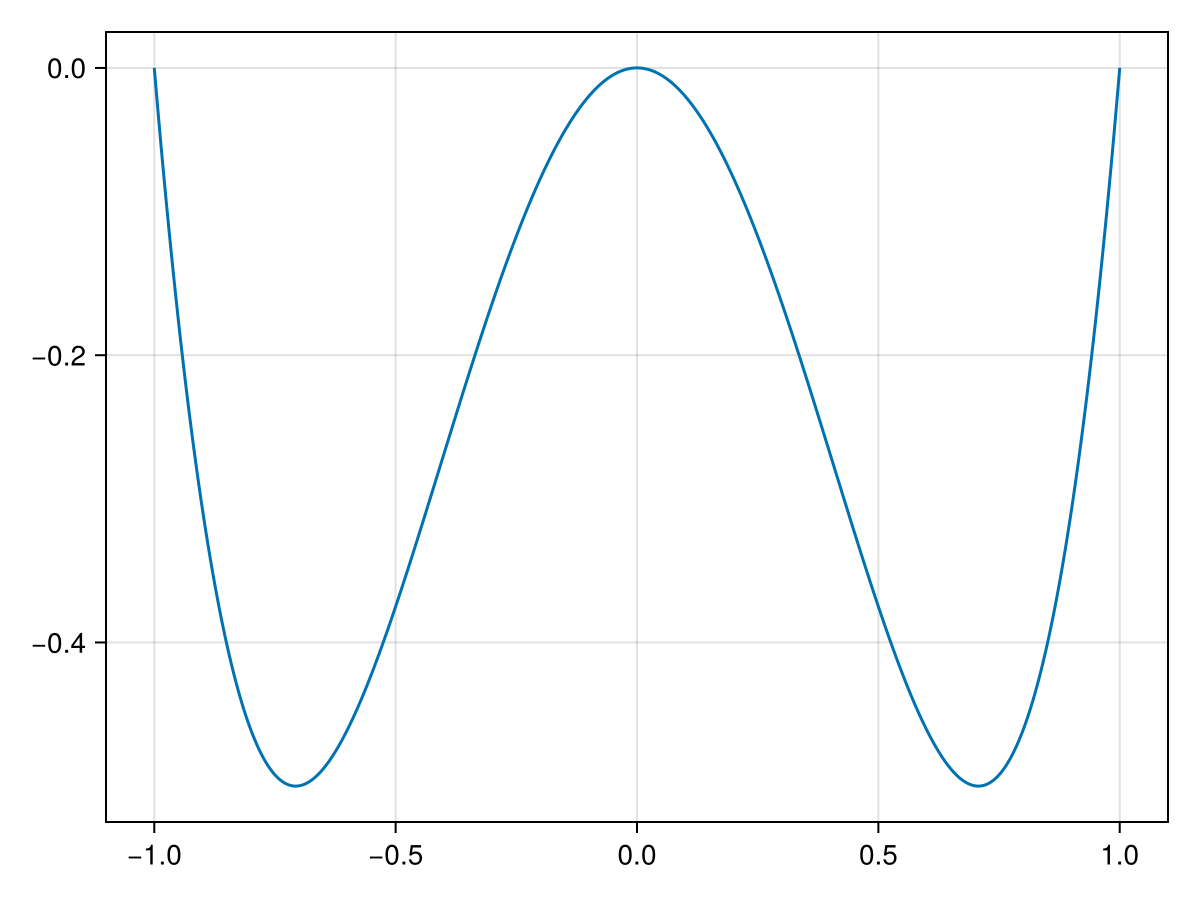

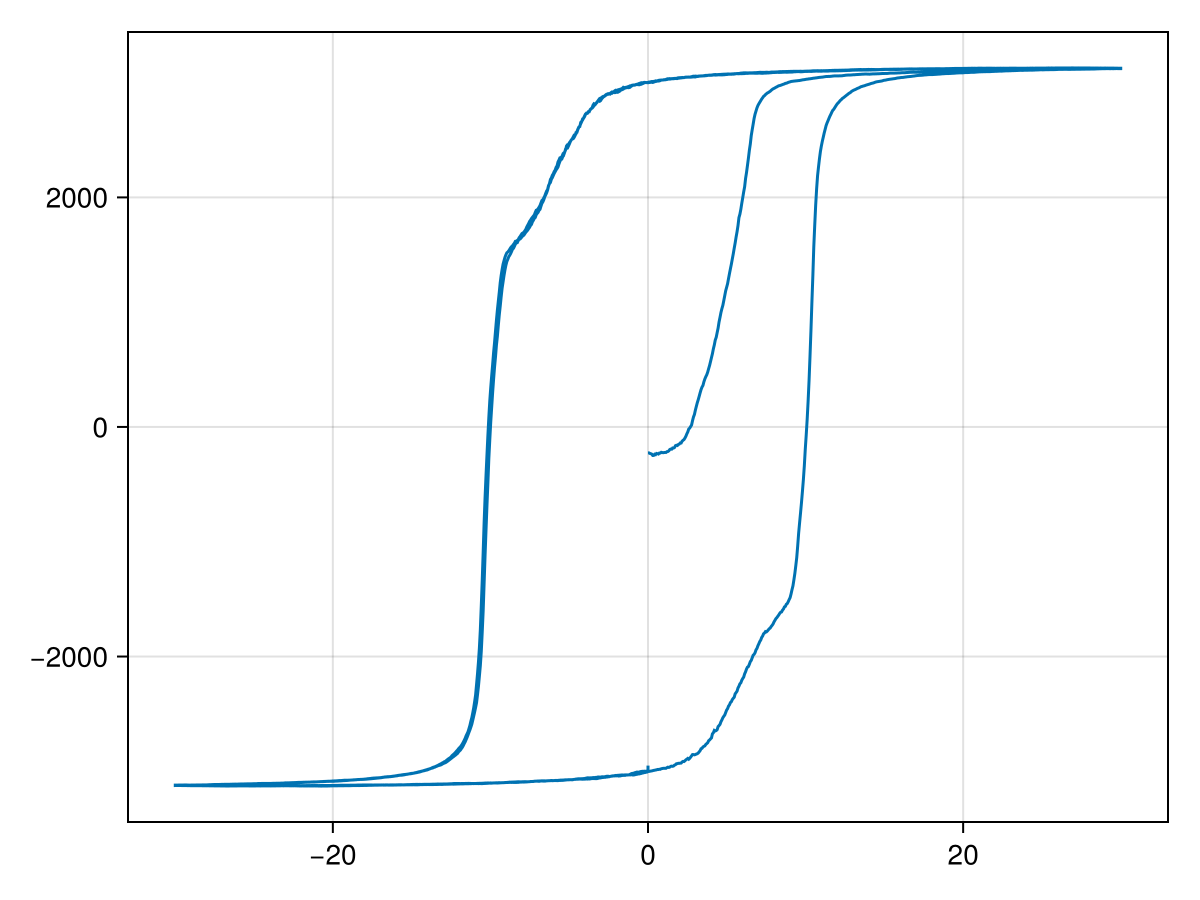

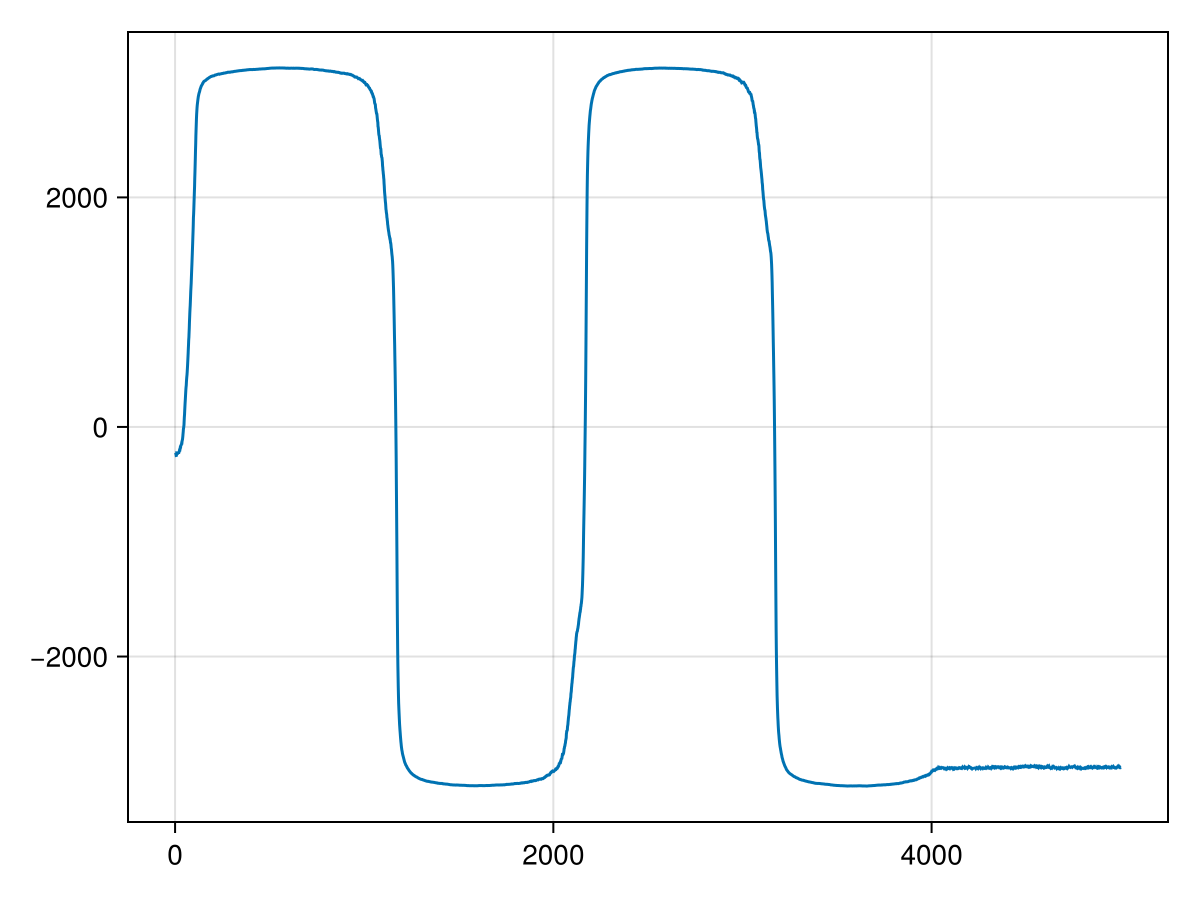

In [7]:
temp(g,1)
Layer_Dep = 1
Cdep=1
Cz = 1
g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/z) + Quartic(g) + Sextic(g)
reprepare(g)


# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)
### Set Qc*Jii
g.hamiltonian[4].qc[] = b1/a1
### Set Sc*Jii
g.hamiltonian[5].sc[] = c1/a1


fullsweep = xL*yL*zL
Time_fctr = 0.5
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =30
PulseN = 2
Pulsetime = (PulseN * 4 + 2) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;


inlineplot() do 
    lines(Ex, Ey)
end

inlineplot() do 
    lines(voltage, Pr)
end

inlineplot() do 
    lines(Pr)
end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)

┌ Warning: An algorithm is providing arguments that are already defined in the input arguments: [:g]. 
│  The algorithm arguments will be used.
└ @ InteractiveIsing.Processes d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\Trackers\UniqueAlgorithms.jl:75


Estimated time to completion: 0:0:17
Of which remaining: 0:0:17


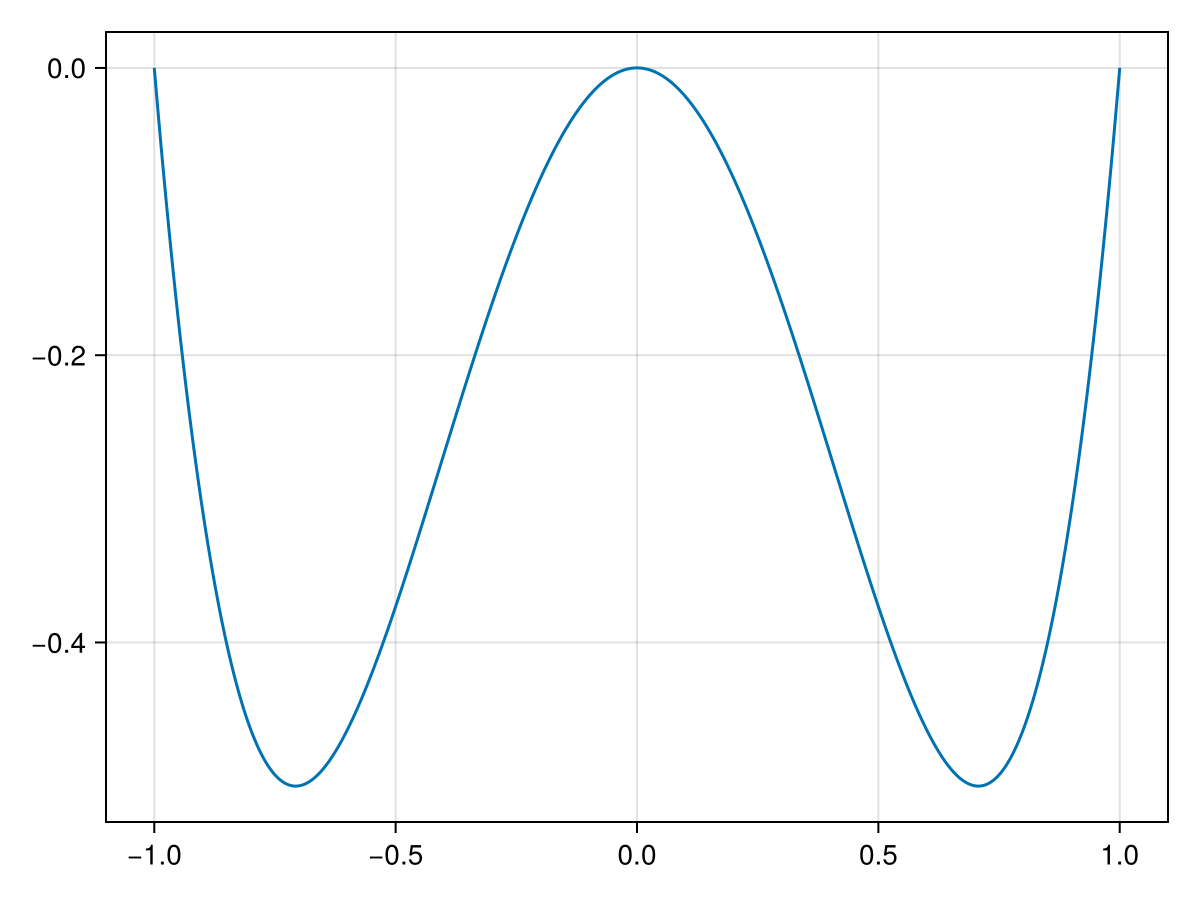

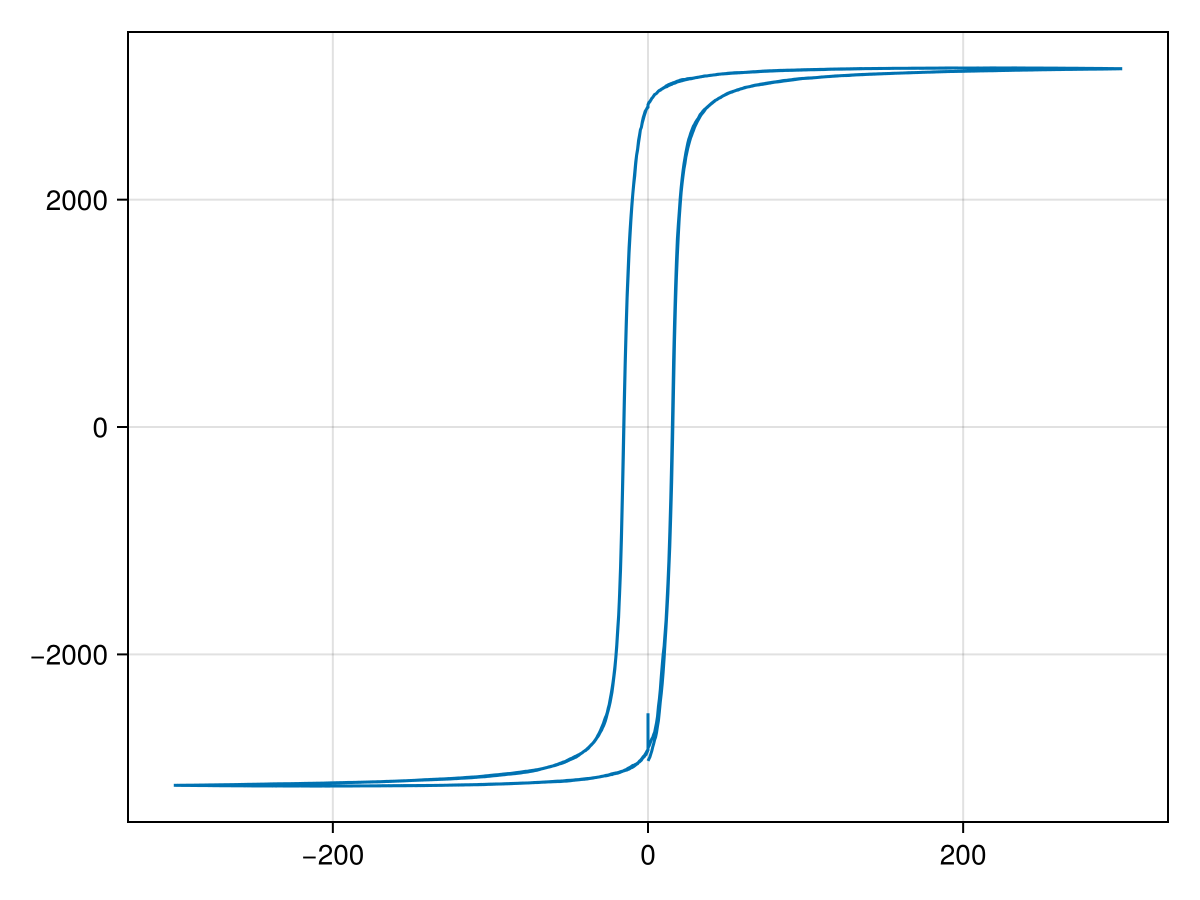

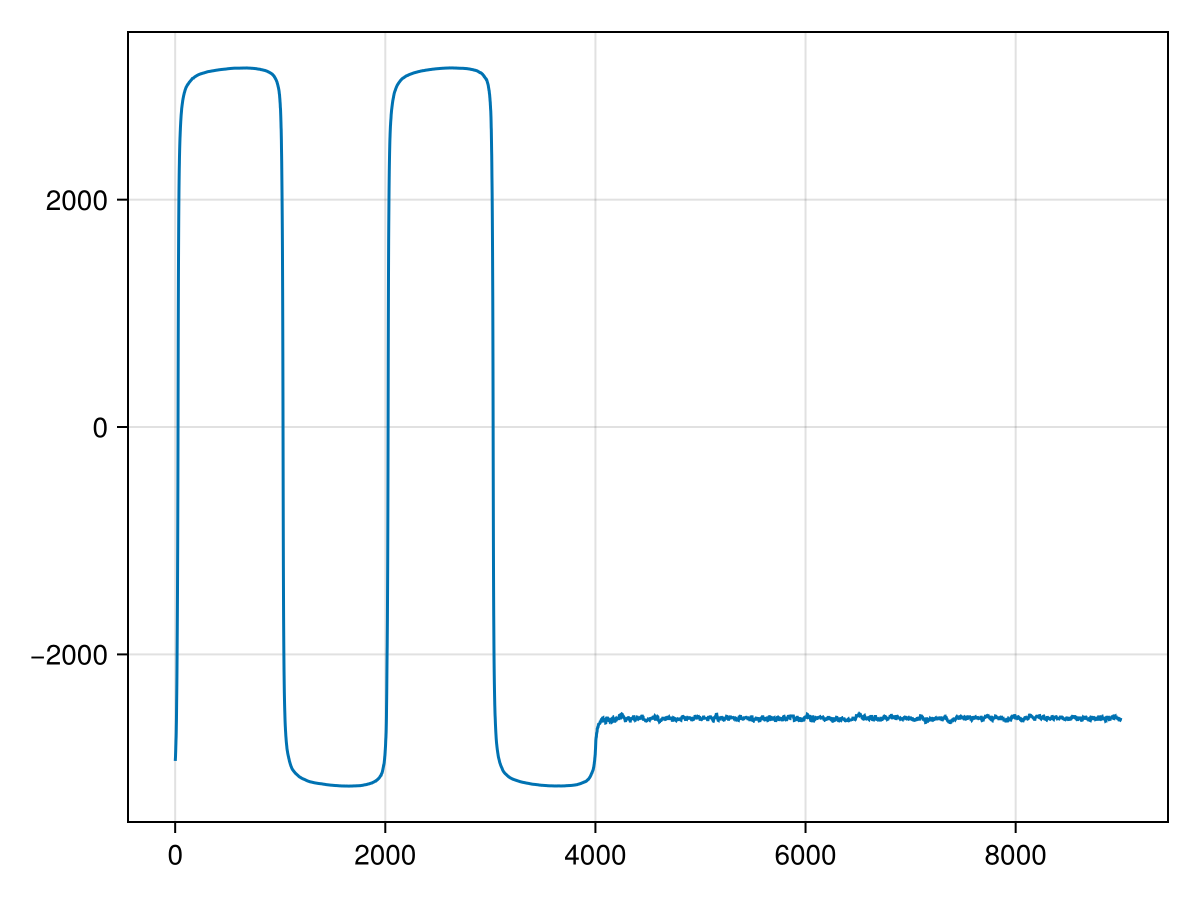

In [8]:
temp(g,3)
Layer_Dep = 1
Cdep=7
Cz = 0.5
g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/z) + Quartic(g) + Sextic(g)
reprepare(g)


# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)
### Set Qc*Jii
g.hamiltonian[4].qc[] = b1/a1
### Set Sc*Jii
g.hamiltonian[5].sc[] = c1/a1


fullsweep = xL*yL*zL
Time_fctr = 0.5
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =300
PulseN = 2
Pulsetime = (PulseN * 4 + 10) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;


inlineplot() do 
    lines(Ex, Ey)
end

inlineplot() do 
    lines(voltage, Pr)
end

inlineplot() do 
    lines(Pr)
end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)

┌ Warning: An algorithm is providing arguments that are already defined in the input arguments: [:g]. 
│  The algorithm arguments will be used.
└ @ InteractiveIsing.Processes d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\Trackers\UniqueAlgorithms.jl:75


Estimated time to completion: 0:2:54
Of which remaining: 0:2:54


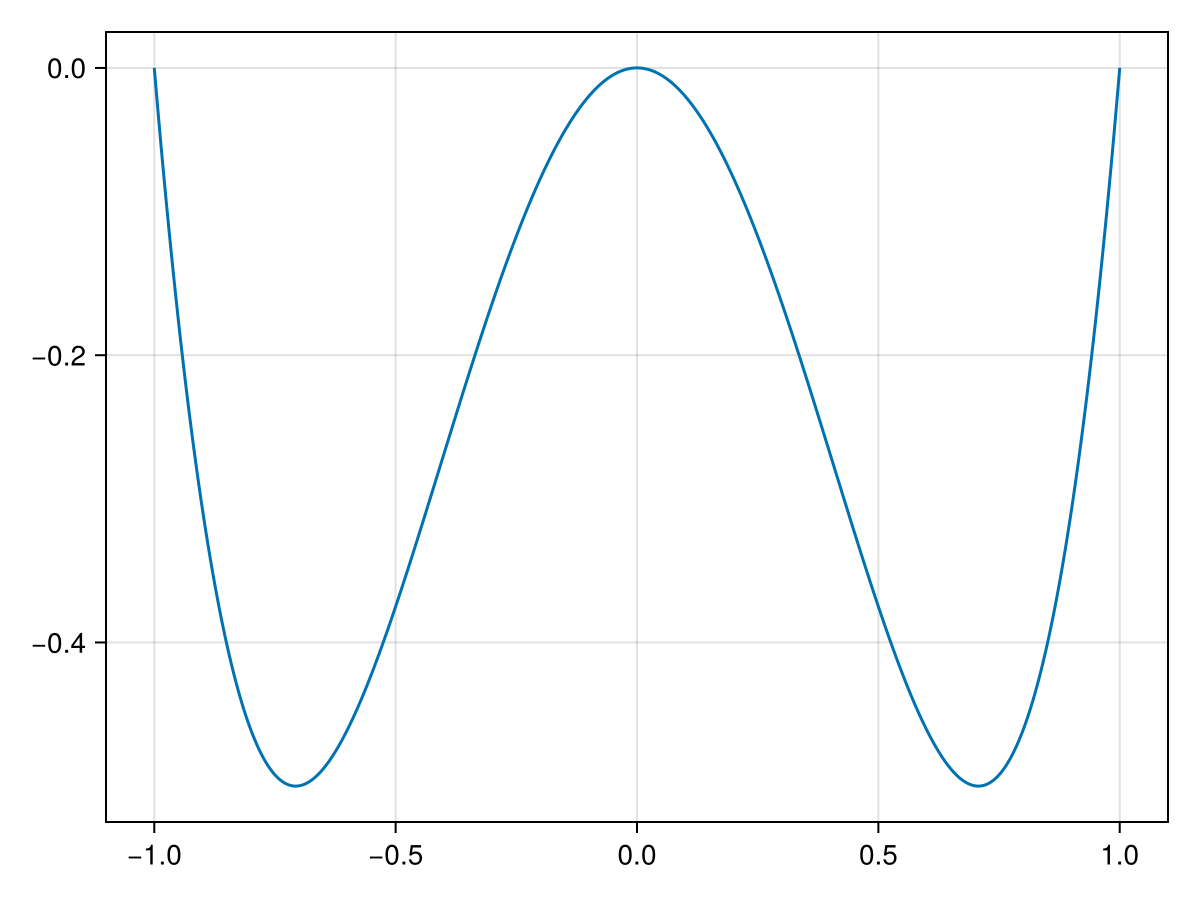

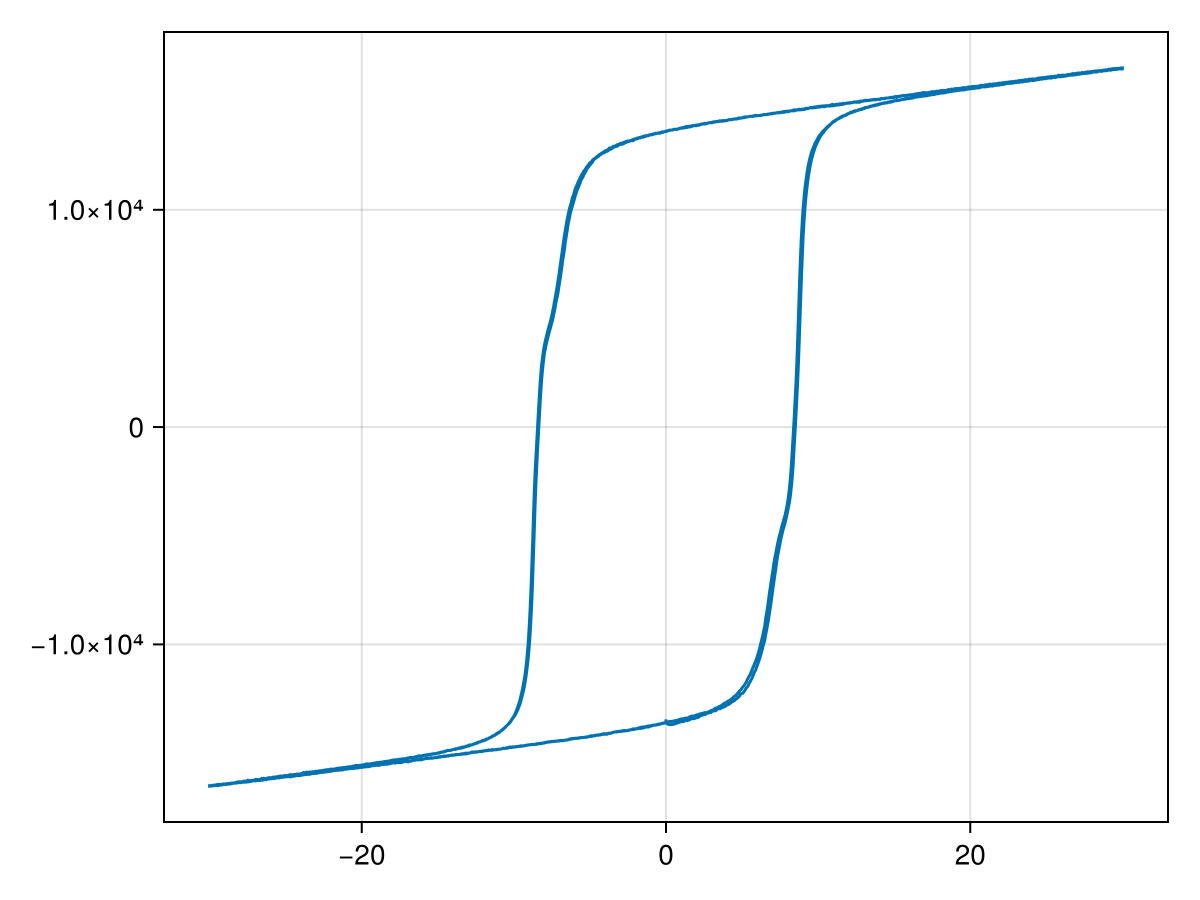

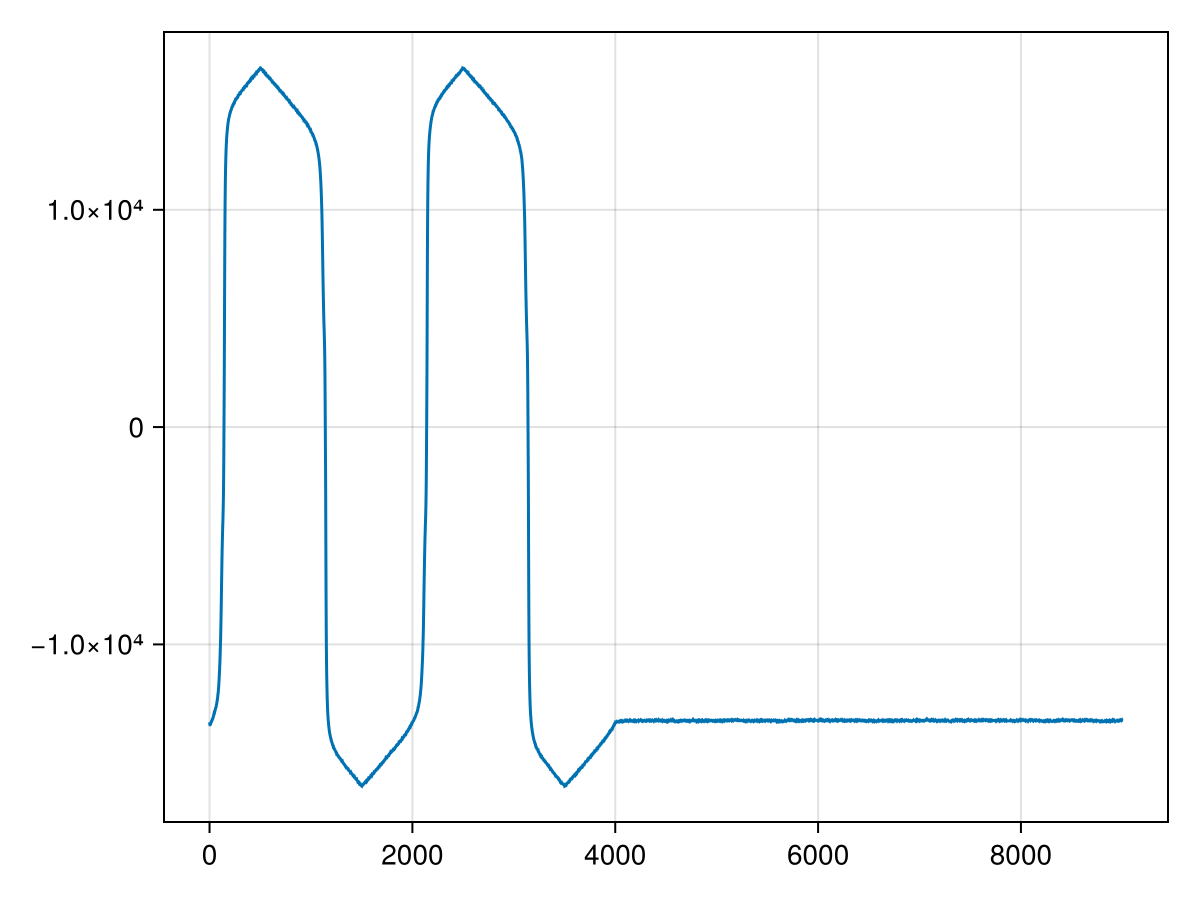

In [21]:
temp(g,1)
Layer_Dep = 3
Cdep=150
Cz = 1
g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/z, NN = 4) + Quartic(g) + Sextic(g)
reprepare(g)


# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)
### Set Qc*Jii
g.hamiltonian[4].qc[] = b1/a1
### Set Sc*Jii
g.hamiltonian[5].sc[] = c1/a1


fullsweep = xL*yL*zL
Time_fctr = 0.5
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =30
PulseN = 2
Pulsetime = (PulseN * 4 + 10) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;


inlineplot() do 
    lines(Ex, Ey)
end

inlineplot() do 
    lines(voltage, Pr)
end

inlineplot() do 
    lines(Pr)
end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)

In [14]:
temp(g,1)
Layer_Dep = 1
Cdep=700
Cz = 0.005
g.hamiltonian = Ising(g) + DepolField(g, c=Cdep/(2*Layer_Dep*xL*yL), top_layers=Layer_Dep, bottom_layers=Layer_Dep, zfunc = z -> Cz/z, NN = 5) + Quartic(g) + Sextic(g)
reprepare(g)


# g.hamiltonian = Ising(g) + DepolField(g, c=300, top_layers=1, bottom_layers=1) + Quartic(g) + Sextic(g)

### Set Jii
g.hamiltonian = sethomogeneousparam(g.hamiltonian, :b)
homogeneousself!(g,a1)
### Set Qc*Jii
g.hamiltonian[4].qc[] = b1/a1
### Set Sc*Jii
g.hamiltonian[5].sc[] = c1/a1


fullsweep = xL*yL*zL
Time_fctr = 0.5
SpeedRate = Int(Time_fctr*fullsweep)
### risepoint and Amptitude are factors from pulse
risepoint=500
Amptitude =30
PulseN = 2
Pulsetime = (PulseN * 4 + 2) * risepoint * SpeedRate

compalgo = CompositeAlgorithm((Metropolis, TrianglePulseA), (1, SpeedRate))
createProcess(g, compalgo, lifetime =Pulsetime, amp = Amptitude, numpulses = PulseN, rise_point=risepoint)
### estimate time
est_remaining(process(g))
# Wait until it is done


┌ Warning: An algorithm is providing arguments that are already defined in the input arguments: [:g]. 
│  The algorithm arguments will be used.
└ @ InteractiveIsing.Processes d:\Code\Haoranbranch\InteractiveIsing.jl\deps\Processes\src\Trackers\UniqueAlgorithms.jl:75


Estimated time to completion: 0:1:19
Of which remaining: 0:1:19


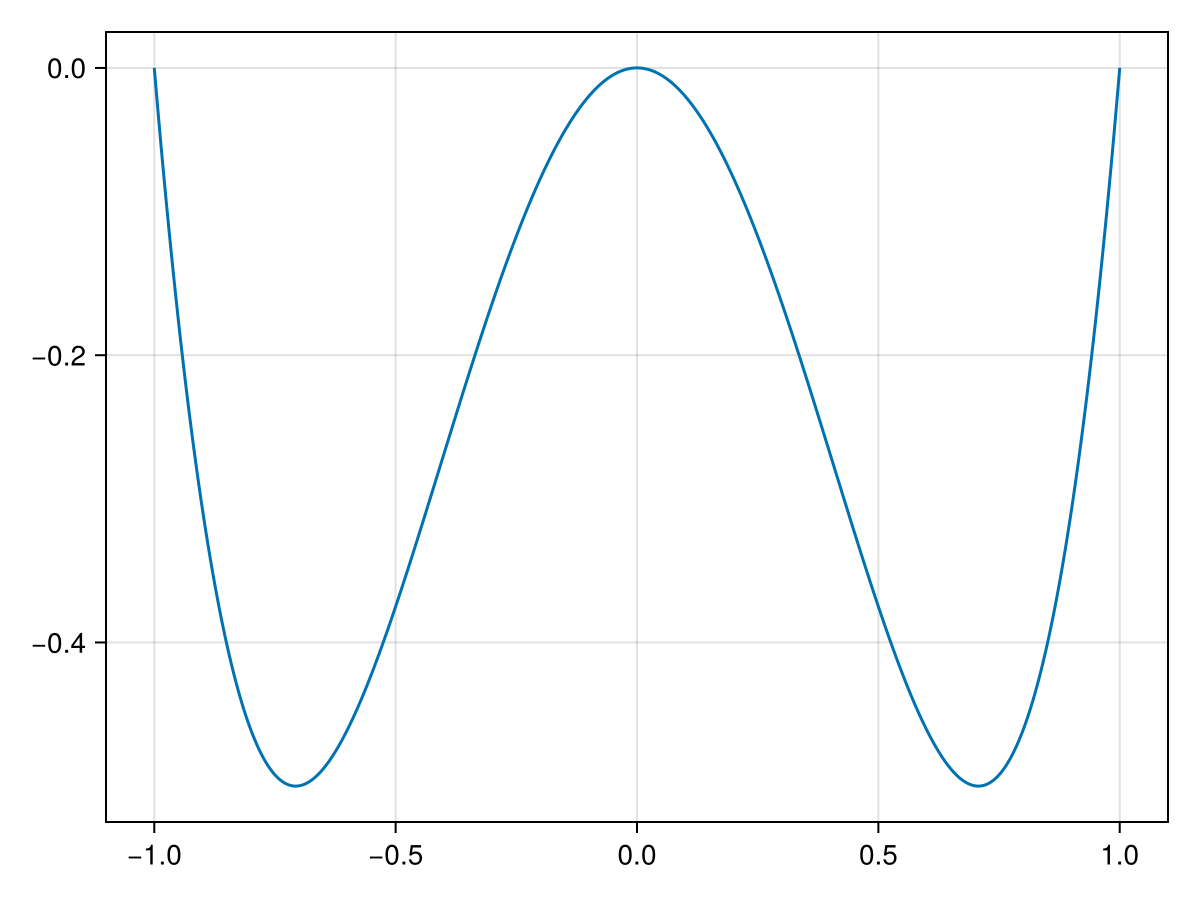

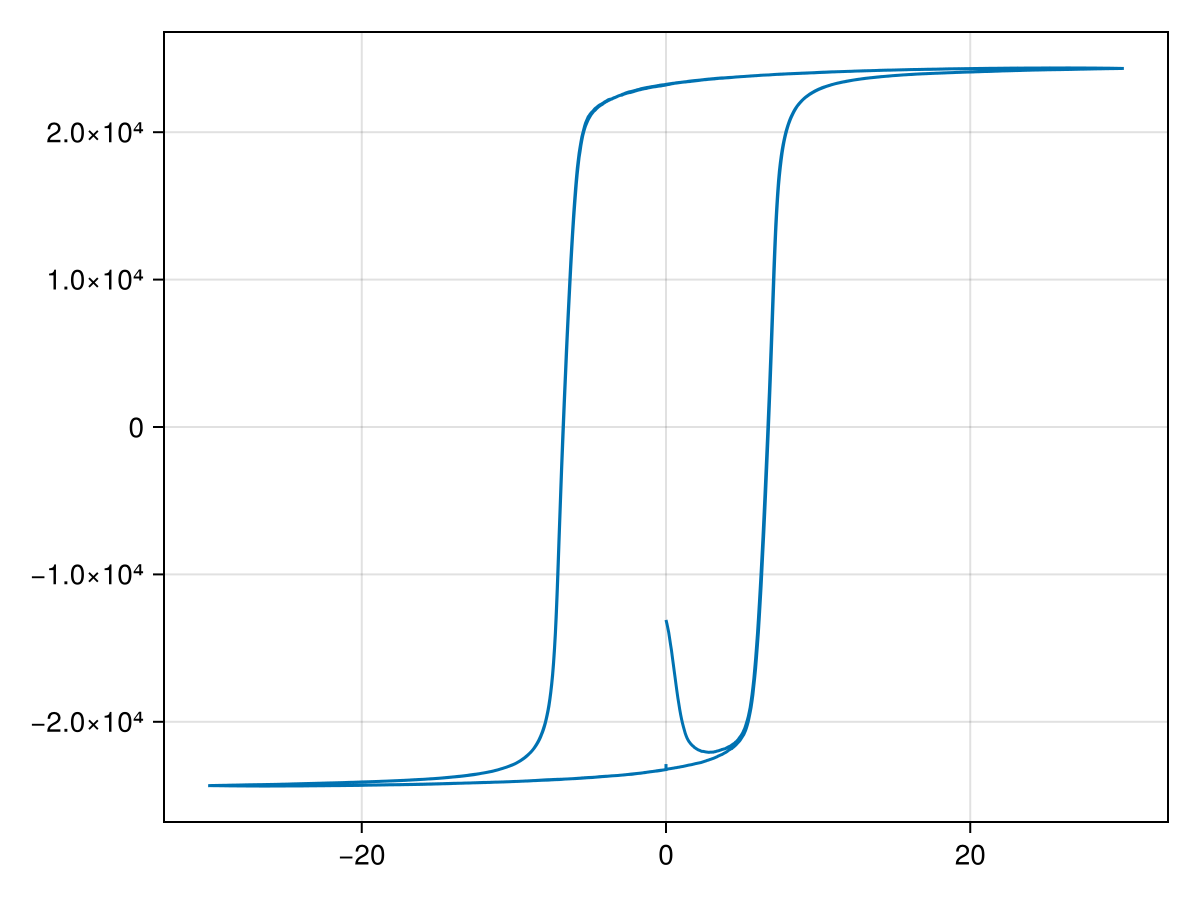

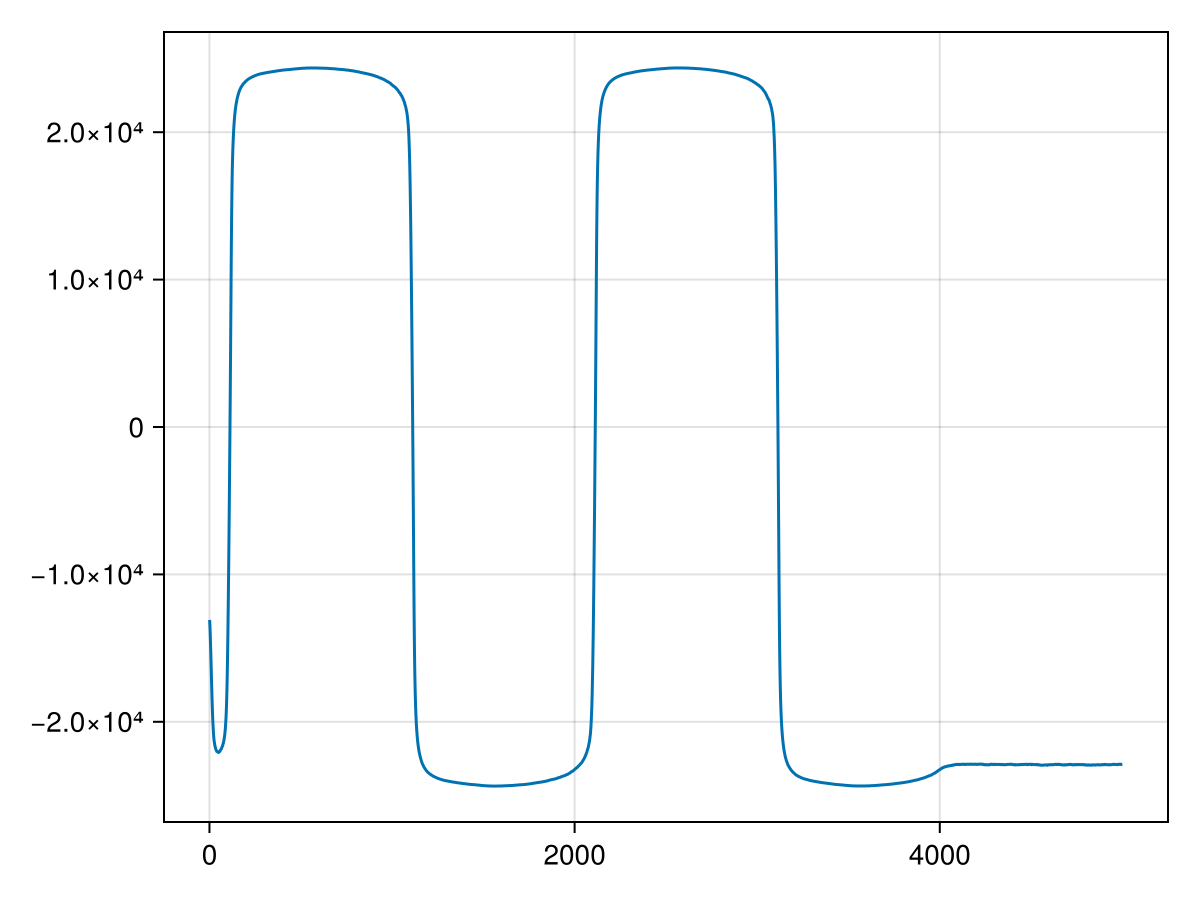

In [11]:
args = process(g) |> fetch # If you want to close ctr+c
# args = process(g) |> getcontext
# EnergyG= args.all_Es;
voltage= args.x
Pr= args.y;

inlineplot() do 
    lines(Ex, Ey)
end

inlineplot() do 
    lines(voltage, Pr)
end

inlineplot() do 
    lines(Pr)
end

# w2=newmakie(lines, voltage, Pr)
# w3=newmakie(lines,Pr)


# show_connections(g,1,1,1)
# visualize_connections(g)